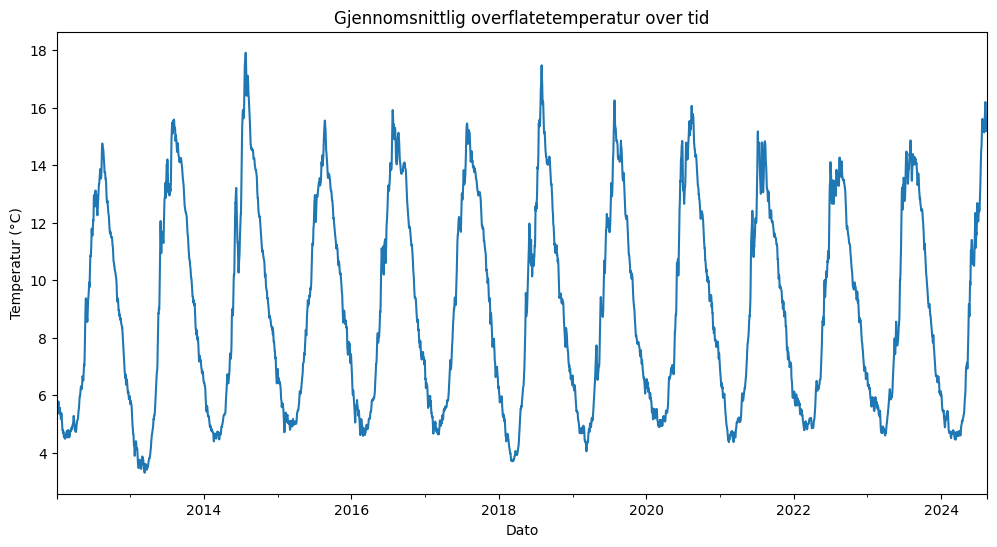

,PO_1,PO_2,PO_3,PO_4,PO_5,PO_6,PO_7,PO_8,PO_9,PO_10,PO_11,PO_12,PO_13,Date
0,5.59,5.59,6.10,5.65,5.90,5.95,6.06,6.14,6.03,5.63,5.28,4.95,4.61,2012-01-05
1,5.53,5.23,5.91,5.62,5.78,5.95,5.94,5.95,5.93,5.53,5.24,4.96,4.60,2012-01-06
2,5.44,5.14,5.94,5.72,5.78,5.81,5.74,5.71,5.83,5.42,5.21,4.96,4.62,2012-01-07
3,5.32,4.92,5.70,5.43,5.53,5.67,5.60,5.64,5.80,5.37,5.19,5.00,4.61,2012-01-08
4,5.19,5.42,6.00,5.96,5.77,5.77,5.82,5.81,5.84,5.37,5.17,5.00,4.57,2012-01-09


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Filsti
file_path = "Bachelor/data/raw/times_NK800_SST_PO.asc"

# Laste inn data
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Navngi kolonnene (Antar at første tre kolonner er år, måned, dag, resten er temperaturer)
num_columns = df.shape[1]
column_names = ['Year', 'Month', 'Day'] + [f'PO_{i+1}' for i in range(num_columns - 3)]
df.columns = column_names

# Konverter dato til datetime-format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sortere etter dato
df = df.sort_values(by='Date')

# Fjerne de separate år/måned/dag-kolonnene
df = df.drop(columns=['Year', 'Month', 'Day'])

# Plot gjennomsnittlig temperatur over tid
df.set_index('Date').mean(axis=1).plot(figsize=(12, 6), title="Gjennomsnittlig overflatetemperatur over tid", ylabel="Temperatur (°C)", xlabel="Dato")
plt.show()

# Vise de første radene
df.head()


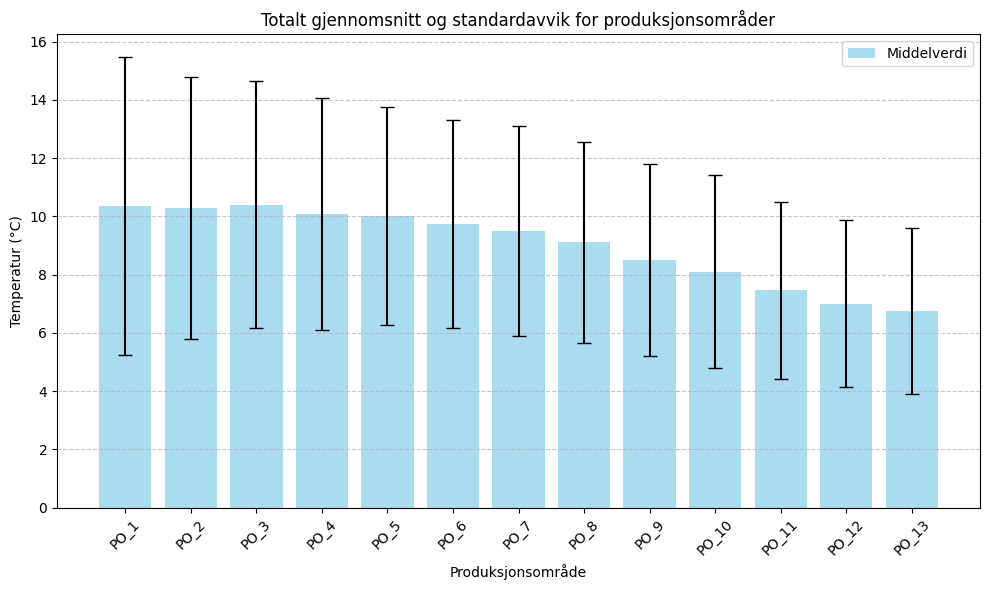

In [11]:
# plotter gjennomsnittlig årlig temperatur for hvert PO med standasavvik i et stolpediagram

# Finn alle kolonner som representerer produksjonsområder
po_cols = [col for col in df.columns if col.startswith('PO_')]

# Beregn totalt gjennomsnitt og standardavvik for hvert produksjonsområde
po_means = df[po_cols].mean()
po_stds = df[po_cols].std()

# Plot stolpediagram
plt.figure(figsize=(10, 6))
plt.bar(po_means.index, po_means, yerr=po_stds, capsize=5, alpha=0.7, color='skyblue', label='Middelverdi')
plt.title("Totalt gjennomsnitt og standardavvik for produksjonsområder")
plt.xlabel("Produksjonsområde")
plt.ylabel("Temperatur (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

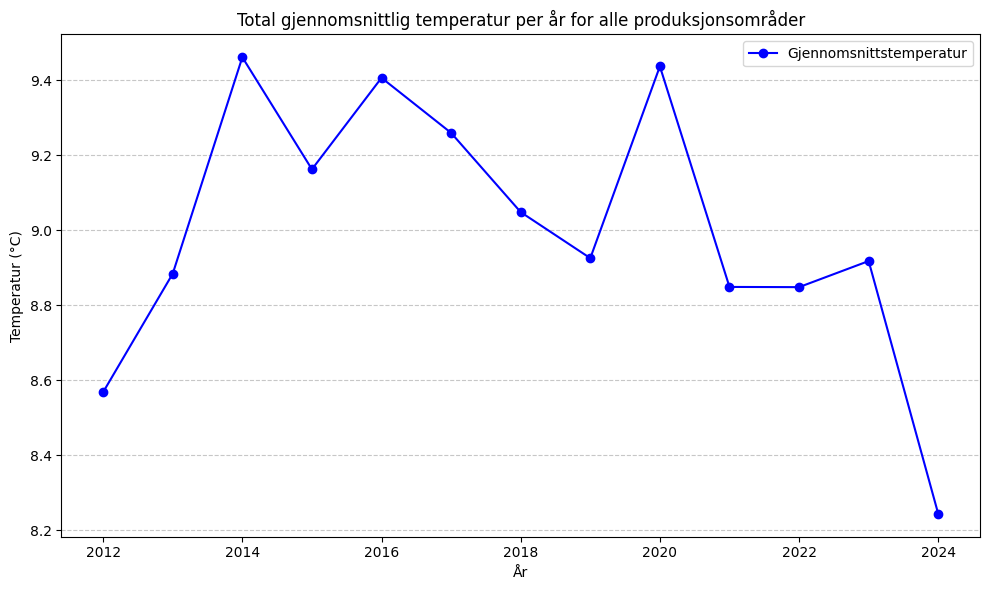

In [14]:
# Plot gjennomsnittlig årlig temperatur for alle produksjonsområder
# Opprett en kolonne med "Year" basert på "Date"
df['Year'] = df['Date'].dt.year

# Finn alle kolonner som representerer produksjonsområder
po_cols = [col for col in df.columns if col.startswith('PO_')]

# Beregn årlig gjennomsnittstemperatur for alle produksjonsområder
df['PO_Mean'] = df[po_cols].mean(axis=1)
annual_mean_temp = df.groupby('Year')['PO_Mean'].mean()

# Plot linjediagram
plt.figure(figsize=(10, 6))
plt.plot(annual_mean_temp.index, annual_mean_temp.values, marker='o', linestyle='-', color='b', label='Gjennomsnittstemperatur')
plt.title("Total gjennomsnittlig temperatur per år for alle produksjonsområder")
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

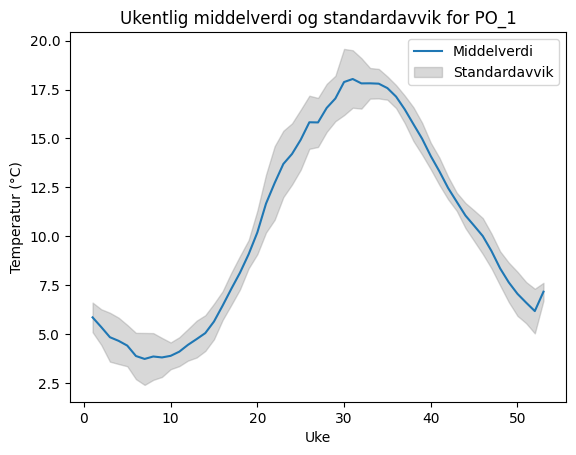

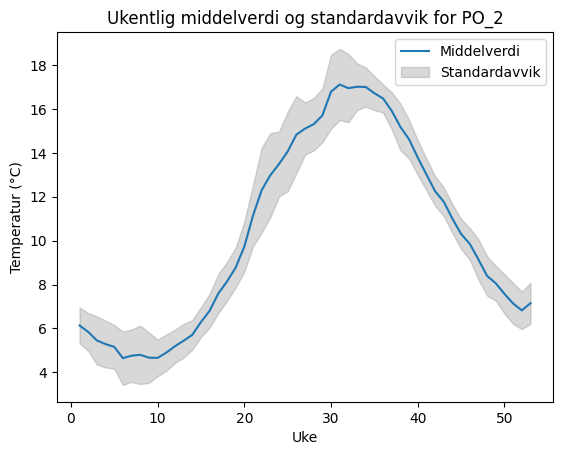

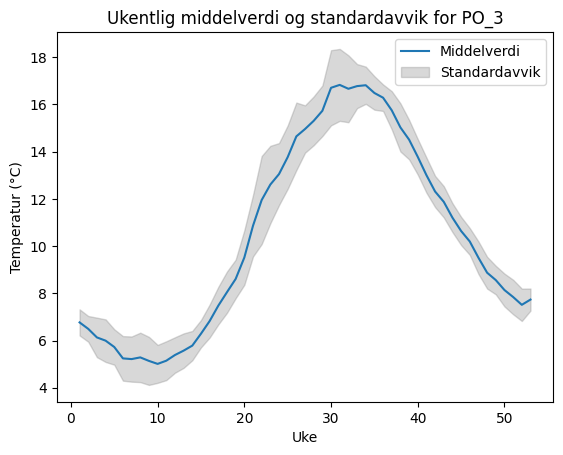

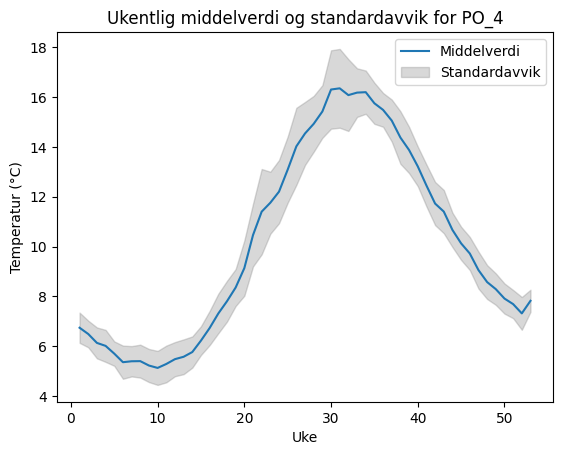

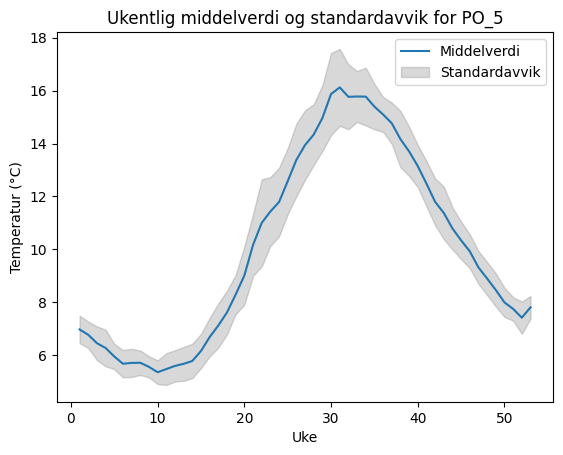

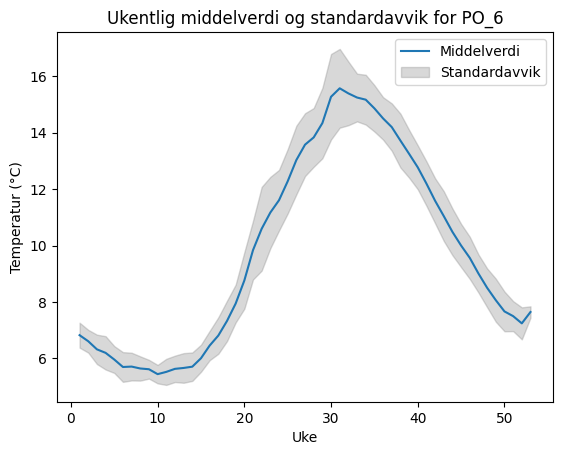

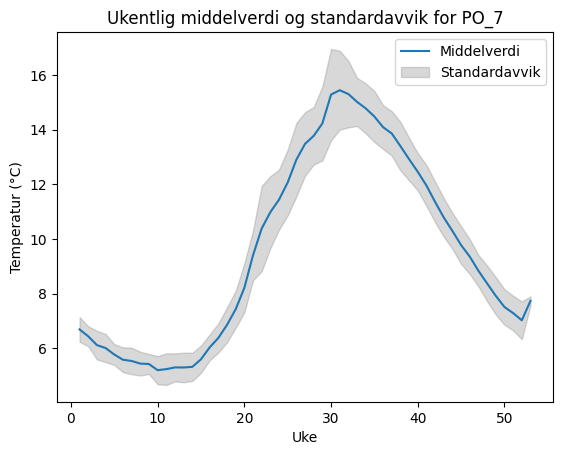

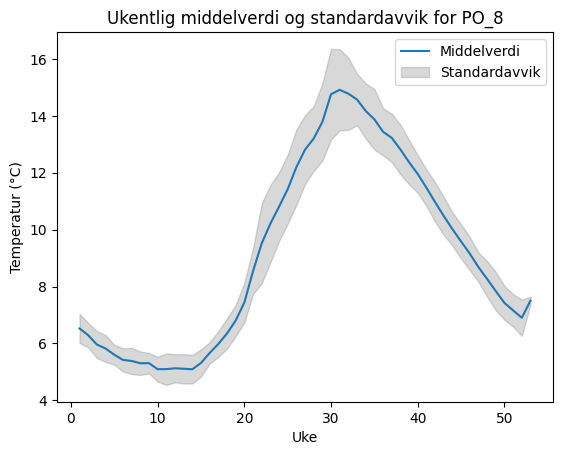

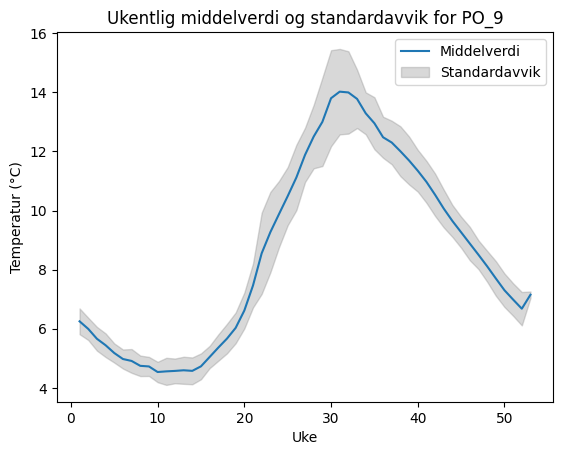

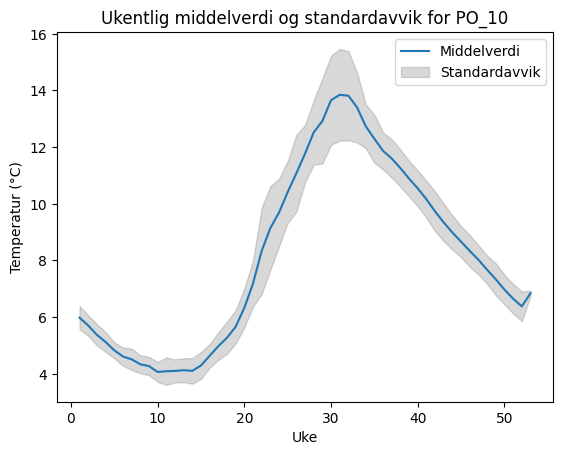

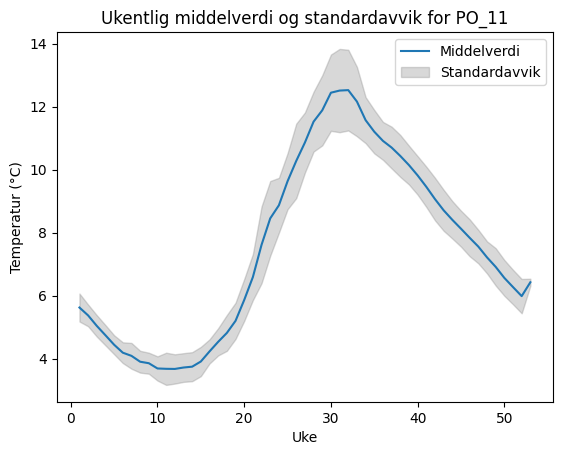

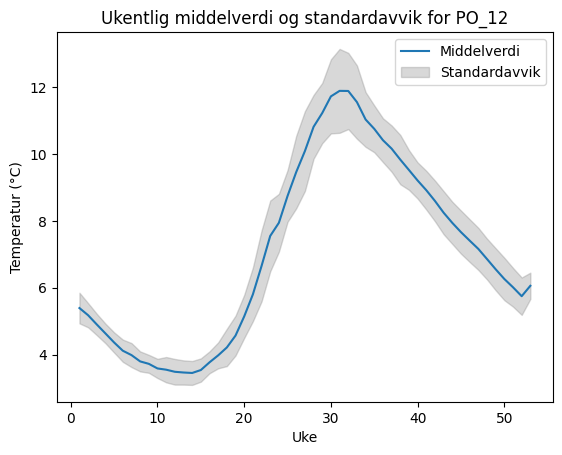

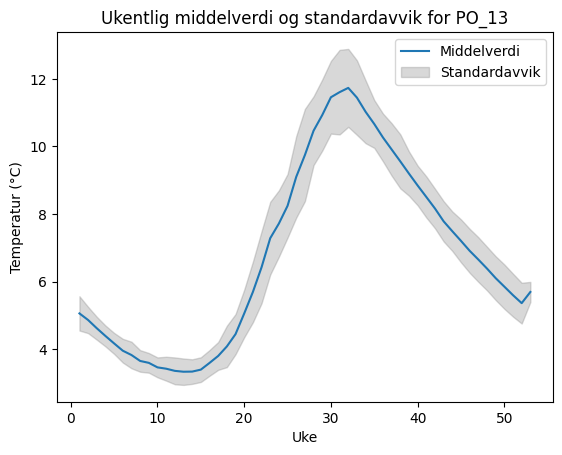

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Opprett en kolonne med "Week" basert på "Date"
df['Week'] = df['Date'].dt.isocalendar().week

# Finn alle kolonner som representerer produksjonsområder
po_cols = [col for col in df.columns if col.startswith('PO_')]

# Plot ukentlig middelverdi og standardavvik for hvert produksjonsområde
for col in po_cols:
    weekly_stats = df.groupby('Week')[col].agg(['mean', 'std']).reset_index()
    
    # Plot middelverdi med standardavvik som skyggelagt område
    plt.figure()
    plt.plot(weekly_stats['Week'], weekly_stats['mean'], label='Middelverdi')
    plt.fill_between(weekly_stats['Week'].astype(int),
                     weekly_stats['mean'] - weekly_stats['std'],
                     weekly_stats['mean'] + weekly_stats['std'],
                     color='gray', alpha=0.3, label='Standardavvik')
    plt.title(f"Ukentlig middelverdi og standardavvik for {col}")
    plt.xlabel("Uke")
    plt.ylabel("Temperatur (°C)")
    plt.legend()
    plt.show()
    
    

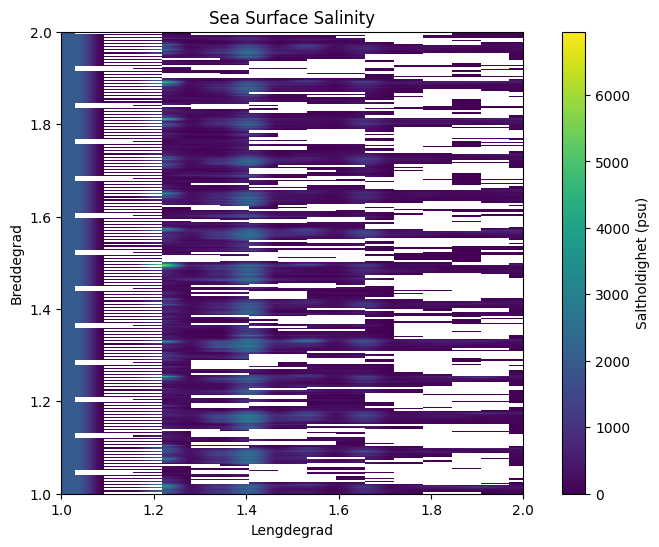